<a href="https://colab.research.google.com/github/kevmanning/DS-Unit-2-Linear-Models/blob/master/DS_Sprint_Challenge_21_Kevin_Manning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1*

---

👇 **Do not change the code in this cell.** If you're working in Google Colab, you can run this cell to install `category_encoders`.

In [1]:
%%capture
# If you're in Colab...
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*

 
# Sprint Challenge: Predicting Home Prices in Iowa 🏠

The goal of this assignment is to build a regression model that can predict the sale price of a house in Aimes, Iowa.

# Directions 

This notebook contains 12 tasks, which cover the material we've learned in this sprint. Here's a summary:

- **Task 1:** Import training data.
- **Task 2 (`stretch goal`):** Create scatter plot.
- **Task 3:** Split data into feature matrix and target vector.
- **Task 4:** Split data into training and validation sets.
- **Task 5:** Establish baseline mean absolute error.
- **Task 6:** Build and train linear regression model.
- **Task 7:** Build and train ridge regression model.
- **Task 8:** Calculate mean absolute error for training and validation sets.
- **Task 9:** Calculate $R^2$ for validation set.
- **Task 10:** Make predictions based on test set.
- **Task 11 (`stretch goal`):** Get below 18,000 for test set MAE. 
- **Task 12 (`stretch goal`):** Plot model coefficients.

For each task you should do the following:

- Read the task instructions.
- Write your code in the cell below the task. Delete the `raise NotImplementedError` before your start.
- Run the testing cell below the task. If you get an error, read the error message and re-evaluate your code.

**You should limit your code to the following libraries:**

- `category_encoders`
- `numpy`
- `matplotlib`
- `pandas`
- `sklearn` 

# Tasks

## I. Wrangle Data

**Task 1:** Since real estate prices fluctuate over time, it's important to index the houses in this dataset using the year in which they were sold. First, load the dataset into a DataFrame named `df` and find the column that states the year sold. Next, modify the code below so that `Yr_Sold` column is parsed as a datetime object and set as the index.

In [2]:
'''T1: Import data into DataFrame `df`.'''
import pandas as pd

url_train = 'https://drive.google.com/uc?export=download&id=1tmYLQ1RwIgjI_d66PWnlXU-5D_VxtiQc'
df = pd.read_csv(url_train)
# YOUR CODE HERE

import pandas as pd
import numpy as np
df.shape

(2564, 47)

In [3]:
df.sample(3)

,Yr_Sold,1st_Flr_SF,Bedroom_AbvGr,Bldg_Type,Bsmt_Full_Bath,Bsmt_Half_Bath,Central_Air,Condition_1,Condition_2,Electrical,Exter_Cond,Exter_Qual,Exterior_1st,Exterior_2nd,Foundation,Full_Bath,Functional,Gr_Liv_Area,Half_Bath,Heating,Heating_QC,House_Style,Kitchen_AbvGr,Kitchen_Qual,Land_Contour,Land_Slope,Lot_Area,Lot_Config,Lot_Shape,MS_SubClass,MS_Zoning,Mas_Vnr_Type,Mo_Sold,Neighborhood,Overall_Cond,Overall_Qual,Paved_Drive,Roof_Matl,Roof_Style,SalePrice,Sale_Condition,Sale_Type,Street,TotRms_AbvGrd,Utilities,Year_Built,Year_Remod/Add
1800,2007-01-01,738,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,PConc,2,Typ,1476,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8145,Inside,IR1,60,RL,None,6,CollgCr,5,7,Y,CompShg,Gable,179400,Partial,New,Pave,7,AllPub,2007,2007
1865,2007-01-01,529,2,Twnhs,0.0,0.0,Y,Norm,Norm,SBrkr,Gd,TA,MetalSd,MetalSd,CBlock,1,Typ,1045,0,GasA,Gd,2Story,1,TA,Lvl,Gtl,1782,Inside,Reg,160,RM,None,12,Blueste,6,6,Y,CompShg,Gable,123900,Normal,WD,Pave,5,AllPub,1980,1980
2345,2006-01-01,934,2,1Fam,0.0,1.0,Y,Norm,Norm,SBrkr,Gd,TA,HdBoard,Plywood,CBlock,1,Typ,934,0,GasA,TA,SLvl,1,TA,Lvl,Gtl,10366,Corner,IR1,80,RL,None,7,Sawyer,7,6,Y,CompShg,Gable,132000,Normal,WD,Pave,4,AllPub,1964,1964


In [4]:
df.dtypes

Yr_Sold            object
1st_Flr_SF          int64
Bedroom_AbvGr       int64
Bldg_Type          object
Bsmt_Full_Bath    float64
Bsmt_Half_Bath    float64
Central_Air        object
Condition_1        object
Condition_2        object
Electrical         object
Exter_Cond         object
Exter_Qual         object
Exterior_1st       object
Exterior_2nd       object
Foundation         object
Full_Bath           int64
Functional         object
Gr_Liv_Area         int64
Half_Bath           int64
Heating            object
Heating_QC         object
House_Style        object
Kitchen_AbvGr       int64
Kitchen_Qual       object
Land_Contour       object
Land_Slope         object
Lot_Area            int64
Lot_Config         object
Lot_Shape          object
MS_SubClass         int64
MS_Zoning          object
Mas_Vnr_Type       object
Mo_Sold             int64
Neighborhood       object
Overall_Cond        int64
Overall_Qual        int64
Paved_Drive        object
Roof_Matl          object
Roof_Style  

In [5]:
print(df.isnull().sum())

Yr_Sold           0
1st_Flr_SF        0
Bedroom_AbvGr     0
Bldg_Type         0
Bsmt_Full_Bath    0
Bsmt_Half_Bath    0
Central_Air       0
Condition_1       0
Condition_2       0
Electrical        0
Exter_Cond        0
Exter_Qual        0
Exterior_1st      0
Exterior_2nd      0
Foundation        0
Full_Bath         0
Functional        0
Gr_Liv_Area       0
Half_Bath         0
Heating           0
Heating_QC        0
House_Style       0
Kitchen_AbvGr     0
Kitchen_Qual      0
Land_Contour      0
Land_Slope        0
Lot_Area          0
Lot_Config        0
Lot_Shape         0
MS_SubClass       0
MS_Zoning         0
Mas_Vnr_Type      0
Mo_Sold           0
Neighborhood      0
Overall_Cond      0
Overall_Qual      0
Paved_Drive       0
Roof_Matl         0
Roof_Style        0
SalePrice         0
Sale_Condition    0
Sale_Type         0
Street            0
TotRms_AbvGrd     0
Utilities         0
Year_Built        0
Year_Remod/Add    0
dtype: int64


In [6]:
df.columns

Index(['Yr_Sold', '1st_Flr_SF', 'Bedroom_AbvGr', 'Bldg_Type', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Central_Air', 'Condition_1', 'Condition_2',
       'Electrical', 'Exter_Cond', 'Exter_Qual', 'Exterior_1st',
       'Exterior_2nd', 'Foundation', 'Full_Bath', 'Functional', 'Gr_Liv_Area',
       'Half_Bath', 'Heating', 'Heating_QC', 'House_Style', 'Kitchen_AbvGr',
       'Kitchen_Qual', 'Land_Contour', 'Land_Slope', 'Lot_Area', 'Lot_Config',
       'Lot_Shape', 'MS_SubClass', 'MS_Zoning', 'Mas_Vnr_Type', 'Mo_Sold',
       'Neighborhood', 'Overall_Cond', 'Overall_Qual', 'Paved_Drive',
       'Roof_Matl', 'Roof_Style', 'SalePrice', 'Sale_Condition', 'Sale_Type',
       'Street', 'TotRms_AbvGrd', 'Utilities', 'Year_Built', 'Year_Remod/Add'],
      dtype='object')

In [7]:
df['Datetime'] = pd.to_datetime(df['Yr_Sold'])
df = df.set_index('Datetime')

In [8]:
df['Year']= pd.DatetimeIndex(df['Yr_Sold']).year

In [9]:
df['Year'].unique()

array([2009, 2008, 2007, 2006])

In [10]:
df.sample(3)

,Yr_Sold,1st_Flr_SF,Bedroom_AbvGr,Bldg_Type,Bsmt_Full_Bath,Bsmt_Half_Bath,Central_Air,Condition_1,Condition_2,Electrical,Exter_Cond,Exter_Qual,Exterior_1st,Exterior_2nd,Foundation,Full_Bath,Functional,Gr_Liv_Area,Half_Bath,Heating,Heating_QC,House_Style,Kitchen_AbvGr,Kitchen_Qual,Land_Contour,Land_Slope,Lot_Area,Lot_Config,Lot_Shape,MS_SubClass,MS_Zoning,Mas_Vnr_Type,Mo_Sold,Neighborhood,Overall_Cond,Overall_Qual,Paved_Drive,Roof_Matl,Roof_Style,SalePrice,Sale_Condition,Sale_Type,Street,TotRms_AbvGrd,Utilities,Year_Built,Year_Remod/Add,Year
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01,2008-01-01,1053,4,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Sdng,BrkTil,1,Typ,1848,1,GasA,Gd,1.5Fin,1,Gd,Bnk,Gtl,13053,Inside,Reg,50,RL,None,6,BrkSide,7,6,N,CompShg,Gambrel,207000,Normal,WD,Pave,8,AllPub,1923,2000,2008
2006-01-01,2006-01-01,869,2,1Fam,0.0,0.0,Y,Norm,Norm,FuseA,TA,TA,Wd Sdng,Wd Sdng,PConc,1,Typ,869,0,GasA,TA,1Story,1,Fa,Bnk,Gtl,5900,Inside,IR1,30,RL,None,8,BrkSide,7,4,Y,CompShg,Gable,85500,Normal,WD,Pave,4,AllPub,1923,1958,2006
2008-01-01,2008-01-01,751,3,1Fam,0.0,0.0,Y,RRNn,Feedr,SBrkr,TA,TA,Wd Sdng,Wd Sdng,BrkTil,2,Typ,1362,0,GasA,Ex,2Story,1,TA,Lvl,Gtl,6155,FR3,IR1,70,RM,None,6,BrkSide,8,6,Y,CompShg,Gable,128000,Normal,WD,Pave,6,AllPub,1920,1999,2008


In [11]:
df.index

DatetimeIndex(['2009-01-01', '2009-01-01', '2009-01-01', '2009-01-01',
               '2009-01-01', '2009-01-01', '2009-01-01', '2009-01-01',
               '2009-01-01', '2009-01-01',
               ...
               '2006-01-01', '2006-01-01', '2006-01-01', '2006-01-01',
               '2006-01-01', '2006-01-01', '2006-01-01', '2006-01-01',
               '2006-01-01', '2006-01-01'],
              dtype='datetime64[ns]', name='Datetime', length=2564, freq=None)

**Task 1 Testing**

In [12]:
'''T1 Testing.'''
assert isinstance(df, pd.DataFrame), '`df` is not a DataFrame. Did you import the data?'
assert len(df) == 2564, 'DataFrame `df` has the wrong number of rows.'
assert isinstance(df.index, pd.DatetimeIndex), '`df` does not have a datetime index.'

**Task 2 (`stretch goal`):** Create a scatter plot that shows `'SalePrice'` as a function of `'Gr_Liv_Area'`. Be sure to label the axes of your plot.

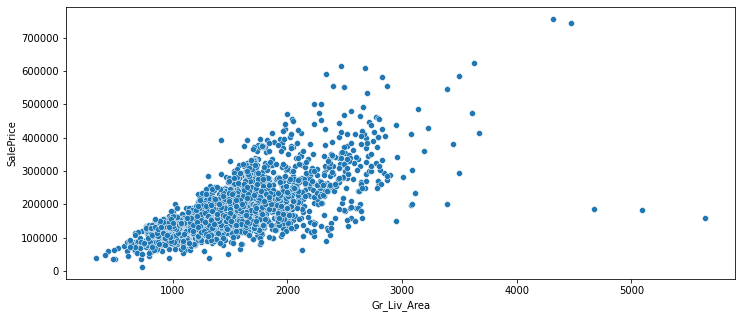

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x="Gr_Liv_Area", y="SalePrice", data=df)
plt.show()

## II. Split Data

**Task 3:** Since you're building a model to predict the price at which a house will be sold, your target is the `'SalePrice'` column. Split the DataFrame `df` into the target vector `y` and the feature matrix `X`. 

In [14]:
'''T3: Split `df` into `X` and `y`.'''

target = 'SalePrice'
features= df.columns.drop([target]+ ['Yr_Sold']+ ['Year'])
# YOUR CODE HERE
y= df[target]
X= df[features]
y.shape, X.shape

((2564,), (2564, 45))

**Task 3 Testing**

In [15]:
'''T3 Tests'''
assert y.shape == (2564,), '`y` either has the wrong number of rows, or is two-dimentional.'
assert X.shape == (2564, 45), '`X` has the wrong number of columns or rows.'
assert 'SalePrice' not in X.columns, 'Target is still part of feature matrix.' 

**Task 4:** Split `X` and `y` into training, validation, and test sets. Since housing prices fluctuate over time, you should use the time-based cutoff method. 

- Training: Homes sold before 2009
- Validation: Homes sold during 2009

In [16]:
'''T4: Split `X` and `y` into training, validation, and testing sets.'''

# YOUR CODE HERE
target = 'SalePrice'
features= df.columns.drop([target] + ['Yr_Sold'])
train= df[df['Year'] < 2009]
val= df[df['Year'] == 2009]
X_train = train[features]
X_val= val[features]
y_train= train[target]
y_val= val[target]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1920, 46), (644, 46), (1920,), (644,))

**Task 4 Testing**

In [17]:
'''T4 Tests'''
assert len(X_train) == len(y_train) == 1920, 'Your training set has the wrong number of rows.'
assert len(X_val) == len(y_val) == 644, 'Your validation set has the wrong number of rows.'

## III. Set Baseline

**Task 5:** Before you can create a model to predict sale price, you need to establish a baseline. First, calculate the mean housing price for your training set. Next, calculate the *mean absolute error* for a model that always predicts that mean. Be sure to assign the mean absolute error to a variable named `baseline_mae`.

In [18]:
'''T5: Calculate baseline mean absolute error.'''
from sklearn.metrics import mean_absolute_error

# YOUR CODE HERE
guess= y_train.mean()
y_pred= [guess] * len(y_train)
baseline_mae= mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 58502.9394639757


**Task 5 Testing**

In [19]:
'''T5 Tests'''
assert isinstance(baseline_mae, float), '`baseline_mae` is not a `float`. Have you assigned a value to this variable name?'

## IV. Build Models

**Task 6:** Build and train a linear regression model named `model_lr` that predicts home sale price. Your model should have the following components:

- A `OneHotEncoder` for categorical features.
- A `StandardScaler` so that you can compare your model coefficients after training.
- A `pipeline` that combines transformers and predictor.

**Tip:** For your `OneHotEncoder`, `use_cat_names` should be set to `True`.

In [20]:
X_train.describe(exclude= 'number').T.sort_values(by= 'unique')

,count,unique,top,freq
Utilities,1920,2,AllPub,1919
Central_Air,1920,2,Y,1791
Street,1920,2,Pave,1912
Paved_Drive,1920,3,Y,1731
Land_Slope,1920,3,Gtl,1829
Lot_Shape,1920,4,Reg,1203
Land_Contour,1920,4,Lvl,1716
Kitchen_Qual,1920,4,TA,991
Exter_Qual,1920,4,TA,1197
Bldg_Type,1920,5,1Fam,1588


In [21]:
'''T6: Build and train LinearRegression model.'''
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric= ['1st_Flr_SF', 'Bedroom_AbvGr', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
          'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'MS_SubClass', 'Mo_Sold',
          'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
          'Year_Remod/Add', 'Year']

numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree =2)),('scaler', StandardScaler())])

categorical= ['Utilities', 'Central_Air', 'Street', 'Paved_Drive', 'Land_Slope', 'Land_Slope', 'Exter_Qual','Kitchen_Qual', 'Land_Contour', 'Lot_Shape']

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)])

model_lr= Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LinearRegression())])

model_lr.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
model_lr.score(X_train, y_train)

0.9237258833307445

In [23]:
y_pred2= model_lr.predict(X_train)

In [24]:
model_lr.score(X_val, y_val)

0.8781465011471676

In [25]:
y_pred3= model_lr.predict(X_val)

**Task 6 Testing**

In [26]:
'''T6 Tests'''
from sklearn.pipeline import Pipeline
assert isinstance(model_lr, Pipeline), '`model_lr` is not a pipeline.'
assert len(model_lr.named_steps) > 1, 'Your `model_lr` pipeline is missing components.'

**Task 7:** Build and train a ridge regression model named `model_r` that predicts home sales price. Your model should include the following components:

- A `OneHotEncoder` for categorical features.
- A `StandardScaler` so that you can compare your model coefficients after training.
- A `pipeline` that combines transformers and predictor.

**Tip:** If you combine a `StandardScaler` transformer with a `Ridge` predictor, you should set the `normalize` argument for the latter to `False`.

In [28]:
'''T7. Build and train Ridge model.'''
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
# YOUR CODE HERE
numeric= ['1st_Flr_SF', 'Bedroom_AbvGr', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
          'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'MS_SubClass', 'Mo_Sold',
          'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
          'Year_Remod/Add', 'Year']

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical= ['Central_Air', 'Street', 'Paved_Drive', 'Land_Slope', 'Land_Slope', 'Exter_Qual','Kitchen_Qual', 'Land_Contour', 'Lot_Shape']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)])

model_r = Pipeline(steps=[('preprocessor', preprocessor),('classifier', Ridge())])

model_r.fit(X_train, y_train);

In [29]:
model_r.score(X_train, y_train)

0.8329066325635008

In [30]:
y_pred4= model_r.predict(X_train)

In [31]:
model_r.score(X_val, y_val)

0.8727811384442674

In [32]:
y_pred5= model_r.predict(X_val)

**Task 7 Testing**

In [33]:
assert isinstance(model_r, Pipeline), '`model_r` is not a pipeline.'
assert len(model_r.named_steps) > 1, 'Your `model_r` pipeline is missing components.'

## V. Check Metrics

**Task 8:** Compare your models by calculating their mean absolute error for the training and validation sets. You should assign these to the variables `model_lr_training_mae`, `model_lr_validation_mae`, `model_r_training_mae`, and `model_r_validation_mae`, respectively. The validation MAE for both your models should be lower than your `baseline_mae`.

In [34]:
'''T8: Compare model metrics, MAE.'''
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error

model_lr_training_mae= mean_absolute_error(y_train, y_pred2)
model_lr_validation_mae= mean_absolute_error(y_val, y_pred3)
model_r_training_mae= mean_absolute_error(y_train, y_pred4)
model_r_validation_mae= mean_absolute_error(y_val, y_pred5)


print('Linear Regression Model')
print('Training MAE:', model_lr_training_mae)
print('Validation MAE:', model_lr_validation_mae)
print()
print('Ridge Regression Model')
print('Training MAE:', model_r_training_mae)
print('Validation MAE:', model_r_validation_mae)

Linear Regression Model
Training MAE: 15524.492289295264
Validation MAE: 19751.994296484645

Ridge Regression Model
Training MAE: 20231.303839748816
Validation MAE: 20247.344327396833


**Task 8 Testing**

In [35]:
'''T8 Tests'''
assert isinstance(model_lr_training_mae, float), '`model_lr_training_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_lr_validation_mae, float), '`model_lr_validation_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_training_mae, float), '`model_r_training_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_validation_mae, float), '`model_r_validation_mae` is not a float. Did you assign a value to this variable?'

**Task 9:** Compare your two models by calculating their $R^2$ score for the **validation data**.

In [36]:
'''T9: Compare model metrics, R^2.'''
# YOUR CODE HERE
from sklearn.metrics import r2_score

model_lr_r2_score= model_lr.score(X_val, y_val)
model_r_r2_score= model_r.score(X_val, y_val)

print('Linear Regression R^2:', model_lr_r2_score)
print('Ridge Regression R^2:', model_r_r2_score)

Linear Regression R^2: 0.8781465011471676
Ridge Regression R^2: 0.8727811384442674


**Task 9 Testing**

In [37]:
'''T9 Tests'''
assert isinstance(model_lr_r2_score, float), '`model_lr_r2_score` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_r2_score, float), '`model_r_r2_score` is not a float. Did you assign a value to this variable?'
assert model_lr_r2_score <= 1, 'The maximum value for an R^2 score is 1.'
assert model_r_r2_score <= 1, 'The maximum value for an R^2 score is 1.'

**Task 10:** Based on the metrics above, choose the best of your two models and generate an array of predictions `y_pred` using the test set below.

**Note:** Make sure that you import and clean the test set *exactly the same way* you did with the training set at the start of this notebook.

In [38]:
url_test = 'https://drive.google.com/uc?export=download&id=1y9u8cOWprTjruw8E-ct1c7YaEytToqd_'
X_test = pd.read_csv(url_test)

# YOUR CODE HERE

print('My predictions:', y_pred[:3])

My predictions: [181515.98645833333, 181515.98645833333, 181515.98645833333]


**Task 10 Testing:** There is a hidden test in the cell below. When you submit your notebook to Canvas, your test MAE will be calculated. In order to get the point for this task, your test MAE must be below 58,000.

**Tip:** Use your validation MAE to estimate what your test MAE will be.

In [39]:
import numpy as np
assert isinstance(y_pred, np.ndarray), '`y_pred` should be type `ndarray`.'
assert y_pred.shape == (340,), '`y_pred` should be a 1-dimentional array with 340 predictions.'
# Your test MAE will be printed out below when you submit your assignment.

AssertionError: ignored

**Task 11 (`stretch goal`):** There's no code to write for this task. Below is another testing cell that will calculate the MAE for your test set. In order to get the point for this task, your test MAE must be below 18,000.

**Tip:** Are there any **hyperparameters** in your model that you could adjust to improve performance? 

In [ ]:
assert isinstance(y_pred, np.ndarray), '`y_pred` should be type `ndarray`.'
assert y_pred.shape == (340,), '`y_pred` should be a 1-dimentional array with 340 predictions.'
# Your test MAE will be printed out below when you submit your assignment.

## VI. Explain Model

**Task 12 (`stretch goal`):** Create a horizontal barchart for your best performing model that shows the ten most important features for the model's predictions. Don't forget to label your axes!

In [ ]:
# YOUR CODE HERE
